# Customer Churn Prediction
A machine learning project for predicting whether a customer will churn or not.

The dataset contains the information like personal information of the customer, transaction information, and bank information belonging to a bank. It is often necessary to predict when the customers are going to withdraw their money from the bank account and stay dormant. Being able to predict this, the bank can take necessary action to prevent customers from withdrawing huge sums and stay an active/loyal customer. Our task is to be able to predict the customers who are going to churn based on the information given.

The dataset includes the following columns:
 
-	customer_id: Unique identifier for each customer.
-	vintage: The duration of the customer's relationship with the company.
-	age: Age of the customer.
-	gender: Gender of the customer.
-	dependents: Number of dependents the customer has.
-	occupation: The occupation of the customer.
-	city: City in which the customer is located.
-	customer_nw_category: Net worth category of the customer.
-	branch_code: Code identifying the branch associated with the customer.
-	current_balance: Current balance in the customer's account.
-	previous_month_end_balance: Account balance at the end of the previous month.
-	average_monthly_balance_prevQ: Average monthly balance in the previous quarter.
-	average_monthly_balance_prevQ2: Average monthly balance in the second previous quarter.
-	current_month_credit: Credit amount in the current month.
-	previous_month_credit: Credit amount in the previous month.
-	current_month_debit: Debit amount in the current month.
-	previous_month_debit: Debit amount in the previous month.
-	current_month_balance: Account balance in the current month.
-	previous_month_balance: Account balance in the previous month.
-	churn: The target variable indicating whether the customer has churned (1 for churned, 0 for not churned).
-	last_transaction: Timestamp of the customer's last transaction.



# 1. Data Exploration
In this part we gain an initial insight into our dataset and get to know the different attributes.

In [1]:
#pip install --upgrade threadpoolctl

In [2]:
# import libarys numpy, pandas, matplot, seaborn 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm 
%matplotlib inline

In [3]:
# load dato into dataframe
df = pd.read_csv("churn_prediction.csv")
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [4]:
#show information of whole dataframe and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [5]:
# Determine the dimensions of the dataframe: How many entries and columns does the datafr
def shape(x):
    rows, cols = df.shape
    print(f'The dataframe has {rows} rows and {cols} columns')
shape(df)

The dataframe has 28382 rows and 21 columns


In [6]:
# Summary statistics
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [8]:
# Summary statistics for the label
df['churn'].describe()

count    28382.000000
mean         0.185329
std          0.388571
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [27]:
df[df['churn'] == 1].head(20)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
12,14,2211,73,Male,0.0,retired,44.0,3,409,554.38,...,1794.39,137.25,0.33,500.33,5098.90,508.53,2541.22,2612.60,1,2019-11-14
14,16,1917,48,Female,0.0,self_employed,665.0,2,569,5431.42,...,6532.99,7720.34,0.66,661.73,0.66,2811.53,5437.04,6633.94,1,2019-11-09
16,19,2293,49,Male,0.0,self_employed,1125.0,3,1023,1448.49,...,3021.27,1710.93,190.71,113.64,2461.66,1257.41,1950.95,3127.00,1,2019-12-31
19,22,2181,41,Female,0.0,self_employed,1020.0,2,542,3042.70,...,2843.98,2606.86,0.30,1986.01,104.44,1000.30,3101.18,2692.52,1,2019-11-30
20,23,1548,45,Male,0.0,self_employed,1020.0,2,501,2.18,...,5003.79,1223.60,79.79,70.73,3588.76,744.73,43.07,6859.18,1,2019-12-08
21,24,2440,29,Female,0.0,self_employed,1020.0,2,1106,4792.60,...,5569.58,4826.60,0.47,0.47,357.61,786.19,5029.05,5744.21,1,NaT
24,27,2151,48,Male,2.0,salaried,218.0,2,221,2596.21,...,4867.68,7592.46,0.60,12.45,635.56,6069.10,2847.25,4957.86,1,2019-11-14
30,33,2231,66,Male,0.0,retired,1096.0,1,4029,972.57,...,18028.94,8349.94,18598.44,0.57,192.40,77.77,32799.53,11022.70,1,2019-12-04


In [26]:
df[df['churn'] == 0].head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24


#### Exploration of numerical values

In [9]:
# create a df with all numerical values
df_num = df.select_dtypes(include=['int64', 'float64'])

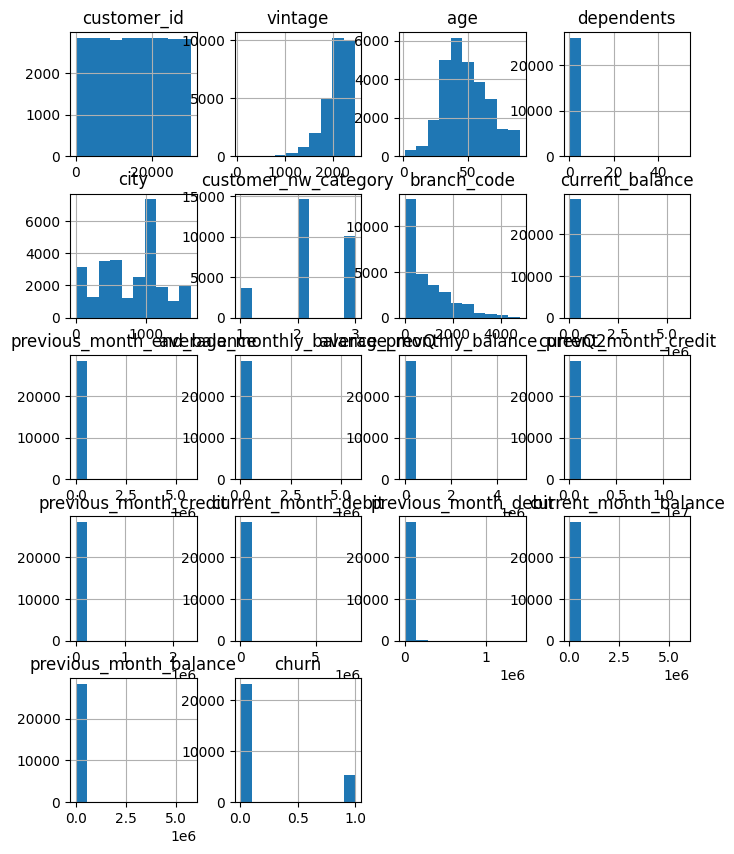

In [10]:
#plot distribution of all numerical attributes in form of histograms
df_num.hist(figsize=[8, 10]);  # the ; hides the output message

<Axes: >

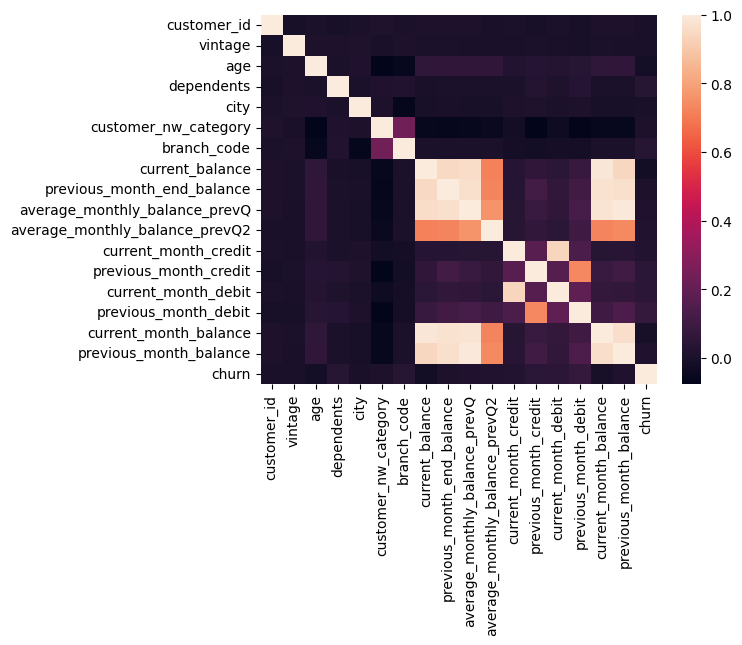

In [11]:
sns.heatmap(df_num.corr()) #heatmap to spot correlations in data

#### Exploration of categorical values

In [12]:
# create a df with all categorical values
df_cat = df.select_dtypes(include=['object'])
df_cat

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
...,...,...,...
28377,Female,student,2019-10-22
28378,Female,self_employed,2019-12-17
28379,Male,salaried,2019-12-31
28380,Male,self_employed,NaT


In [13]:
def get_unique_values(df):
    unique_values = {}
    for column in df:
        unique_count = df[column].nunique()
        
        if pd.api.types.is_numeric_dtype(df[column]) or pd.api.types.is_datetime64_any_dtype(df[column]):
            unique_values[column] = f"Numerische oder Datumsattribute ({unique_count} verschiedene Werte)"
        elif unique_count <= 10:
            unique_values[column] = sorted(df[column].dropna().unique())
        else:
            unique_values[column] = f"Zu viele ({unique_count}) verschiedene Werte für {column}"
    return unique_values

# Beispiel: Annahme, df_cat ist dein DataFrame mit kategorischen Daten
unique_values = get_unique_values(df_cat)

for column, values in unique_values.items():
    print("--")
    print(f"Unique Values in '{column}':")
    print(values)


--
Unique Values in 'gender':
['Female', 'Male']
--
Unique Values in 'occupation':
['company', 'retired', 'salaried', 'self_employed', 'student']
--
Unique Values in 'last_transaction':
Zu viele (361) verschiedene Werte für last_transaction


# 2. Data Cleansing

The goal of this part is to detect and correct or remove invalid/ erroneous data.

In [14]:
print(df.duplicated())  #check whether duplicates exist in the data

0        False
1        False
2        False
3        False
4        False
         ...  
28377    False
28378    False
28379    False
28380    False
28381    False
Length: 28382, dtype: bool


#### Check for NaN

In [15]:
sum(df.isnull().any(axis=1))

3550

In [17]:
df_new = df.dropna(axis=0)

#### Delete irrelevant columns

In [18]:
df_new = df_new.drop(columns=["customer_id", "gender"])  #delete irrelevant attributes 
df_new

,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,2101,66,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
2,2194,31,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,1579,42,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,1923,42,0.0,self_employed,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,2048,72,0.0,retired,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,0.0,student,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,1537,34,0.0,self_employed,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,2376,47,0.0,salaried,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,1745,50,3.0,self_employed,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


# 3. Data Transformation
To ensure data compatibility and change the representation to a machine processable form we will now continue with data transformation.
The goal is better generalizability and processability of the machine learning model.

## 3.1 Label Encoding

In [19]:
# multilabelencoder transofrm categorical data into numeric

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [20]:
# transform all columns with string values
df_encoded = MultiColumnLabelEncoder([col for col in df_new.columns if df_new[col].dtype == 'object']).fit_transform(df_new)
df_encoded

,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,2101,66,0.0,3,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,134
2,2194,31,0.0,2,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,357
4,1579,42,2.0,3,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,298
5,1923,42,0.0,3,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,296
6,2048,72,0.0,1,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,0.0,4,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,286
28378,1537,34,0.0,3,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,342
28379,2376,47,0.0,2,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,356
28380,1745,50,3.0,3,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,357


## 3.2 Scaling
We use the MinMaxScaler to scale attributes with different intervals for normalisation. 
This helps to avoid model manipulation.


In [21]:
# MinMaxScaler without in Calculation
df_min_max_scaled = df_encoded.copy()

# Iteriere durch die Spalten des DataFrames df_num
for column in df_min_max_scaled.columns:
    if df_min_max_scaled[column].dtype in ['int64', 'float64']:
           df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    else:
        continue

display(df_min_max_scaled)


,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,0.843945,0.730337,0.000000,0.75,0.113402,0.5,0.157708,0.004959,0.003285,0.000021,0.012769,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003447,0.004724,0.0,0.375350
2,0.882647,0.337079,0.000000,0.50,0.088539,0.5,0.008366,0.006707,0.006393,0.002492,0.013741,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.005978,0.007297,0.0,1.000000
4,0.626717,0.460674,0.038462,0.75,0.906004,1.0,0.080945,0.004581,0.003244,0.000154,0.013069,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.003232,0.004879,1.0,0.834734
5,0.769871,0.460674,0.000000,0.75,0.664645,0.5,0.348254,0.014748,0.013702,0.009865,0.021552,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.013620,0.014620,0.0,0.829132
6,0.821889,0.797753,0.000000,0.25,0.618557,0.0,0.000000,0.008911,0.007748,0.004603,0.019727,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.007455,0.009210,0.0,0.722689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,0.937162,0.101124,0.000000,1.00,0.618557,0.5,0.252248,0.004687,0.003012,0.000611,0.013721,2.363518e-08,1.227873e-07,3.796876e-08,2.050676e-07,0.003175,0.004451,0.0,0.801120
28378,0.609238,0.370787,0.000000,0.75,0.634324,0.5,0.046434,0.006658,0.005147,0.001603,0.014488,1.385511e-07,9.653620e-07,1.179637e-04,7.170718e-04,0.005074,0.006314,0.0,0.957983
28379,0.958385,0.516854,0.000000,0.50,0.664645,0.5,0.122778,0.050581,0.045777,0.037233,0.027332,3.803495e-04,1.644100e-03,2.202450e-05,5.076483e-05,0.045977,0.044695,1.0,0.997199
28380,0.695797,0.550562,0.057692,0.75,0.739236,1.0,0.057101,0.005078,0.003404,0.000182,0.013060,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003566,0.004843,0.0,1.000000


## 3.3 Discretization
Not used

# 4. k-means Clustering

We will now continue to do the k-means clustering based on the newly cleaned and transformed dataset. 

In [29]:
df_scaled = df_min_max_scaled.copy()
df_scaled

,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,0.843945,0.730337,0.000000,0.75,0.113402,0.5,0.157708,0.004959,0.003285,0.000021,0.012769,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003447,0.004724,0.0,0.375350
2,0.882647,0.337079,0.000000,0.50,0.088539,0.5,0.008366,0.006707,0.006393,0.002492,0.013741,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.005978,0.007297,0.0,1.000000
4,0.626717,0.460674,0.038462,0.75,0.906004,1.0,0.080945,0.004581,0.003244,0.000154,0.013069,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.003232,0.004879,1.0,0.834734
5,0.769871,0.460674,0.000000,0.75,0.664645,0.5,0.348254,0.014748,0.013702,0.009865,0.021552,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.013620,0.014620,0.0,0.829132
6,0.821889,0.797753,0.000000,0.25,0.618557,0.0,0.000000,0.008911,0.007748,0.004603,0.019727,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.007455,0.009210,0.0,0.722689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,0.937162,0.101124,0.000000,1.00,0.618557,0.5,0.252248,0.004687,0.003012,0.000611,0.013721,2.363518e-08,1.227873e-07,3.796876e-08,2.050676e-07,0.003175,0.004451,0.0,0.801120
28378,0.609238,0.370787,0.000000,0.75,0.634324,0.5,0.046434,0.006658,0.005147,0.001603,0.014488,1.385511e-07,9.653620e-07,1.179637e-04,7.170718e-04,0.005074,0.006314,0.0,0.957983
28379,0.958385,0.516854,0.000000,0.50,0.664645,0.5,0.122778,0.050581,0.045777,0.037233,0.027332,3.803495e-04,1.644100e-03,2.202450e-05,5.076483e-05,0.045977,0.044695,1.0,0.997199
28380,0.695797,0.550562,0.057692,0.75,0.739236,1.0,0.057101,0.005078,0.003404,0.000182,0.013060,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003566,0.004843,0.0,1.000000


In [30]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24832 entries, 0 to 28381
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         24832 non-null  float64
 1   age                             24832 non-null  float64
 2   dependents                      24832 non-null  float64
 3   occupation                      24832 non-null  float64
 4   city                            24832 non-null  float64
 5   customer_nw_category            24832 non-null  float64
 6   branch_code                     24832 non-null  float64
 7   current_balance                 24832 non-null  float64
 8   previous_month_end_balance      24832 non-null  float64
 9   average_monthly_balance_prevQ   24832 non-null  float64
 10  average_monthly_balance_prevQ2  24832 non-null  float64
 11  current_month_credit            24832 non-null  float64
 12  previous_month_credit           24832

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85) # use these 85% in the assignment as well
pcadf = pca.fit_transform(df_scaled)
k = pca.n_components_
pca.n_components_ # put out number of dimensions 

5

In [32]:
# we need a dimension of 2 if we want to visualize the data
# set PCA to 2

pca = PCA(2)
pcadf_fix2 = pca.fit_transform(df_scaled)
pcadf_fix2 = pd.DataFrame(pcadf_fix2, columns=["PC"+str(i) for i in range (1, pcadf_fix2.shape[1]+1)])
pcadf_fix2

,PC1,PC2
0,-0.198029,0.090638
1,-0.181916,0.126202
2,0.827682,-0.339754
3,-0.178865,0.068818
4,-0.222631,0.616505
...,...,...
24827,-0.169780,0.074268
24828,-0.180999,0.124596
24829,0.811867,0.149486
24830,-0.168348,-0.357343


In [33]:
Y = pcadf_fix2.values # store results in a variable

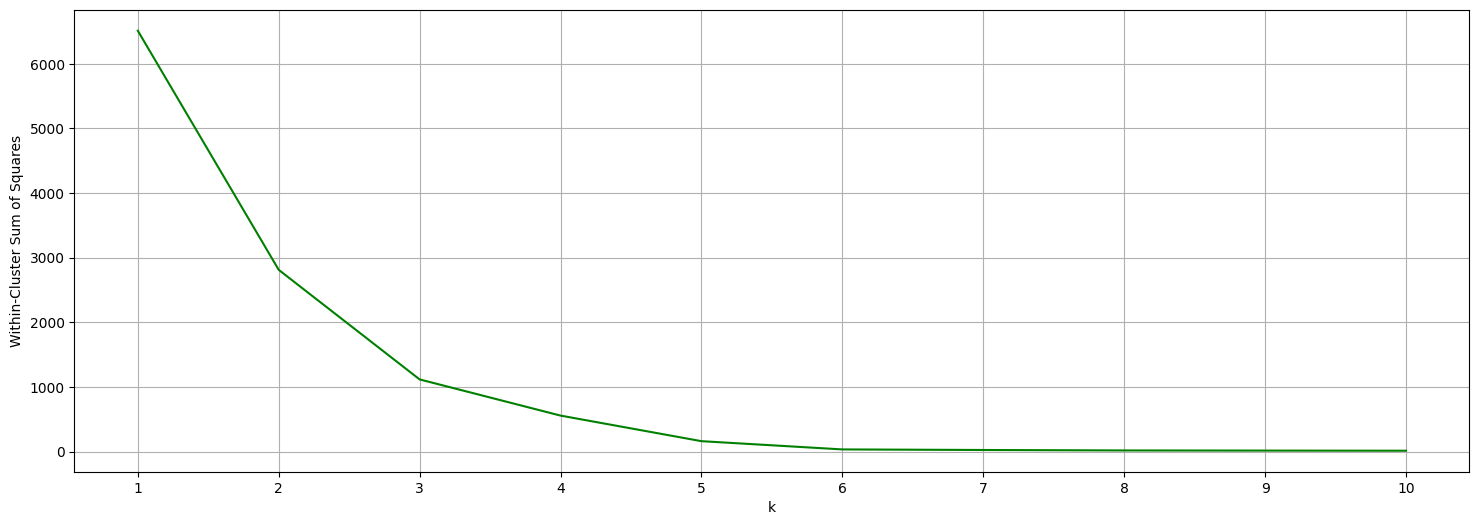

In [34]:
# Ignore future warnings 
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_score = []

for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    inertia_score.append(kmeans.inertia_)

# Visualize
plt.figure(figsize=(18,6))
sns.lineplot(x=range(1,11), y=inertia_score, color="green")
plt.xticks(range(1,11))
plt.xlabel("k")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid()
plt.show()

The Elbow Plot recommends 3 clusters, as increasing the number of clusters further does not generate a significant decrease in heterogeneity.

In [35]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
# random_state shuffles the data, 42 is gernerally used to randomize data
kmeans.fit(Y)

KMeans(n_clusters=3, random_state=42)

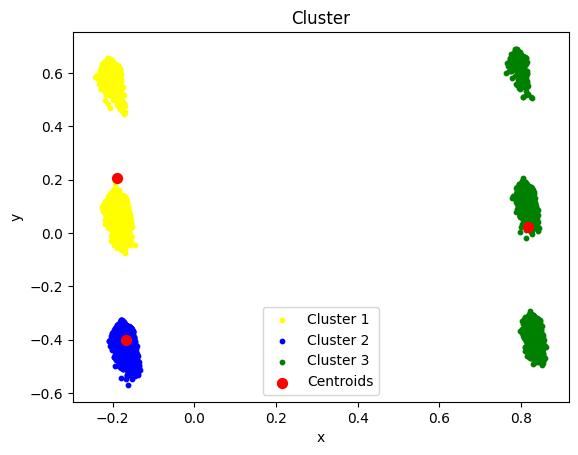

In [36]:
m_kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = m_kmeans.fit_predict(Y)

# Plotting the clusters
colors = ["yellow", "blue", "green"]  # Define colors for each cluster

for cluster_num in range(3):
    plt.scatter(Y[y_kmeans == cluster_num, 0], Y[y_kmeans == cluster_num, 1],
                s=10, c=colors[cluster_num], label="Cluster {}".format(cluster_num + 1))

# Plotting the centroids
plt.scatter(m_kmeans.cluster_centers_[:, 0], m_kmeans.cluster_centers_[:, 1],
            s=50, c="red", label="Centroids")

plt.title("Cluster")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6560319652625646
For n_clusters = 3 The average silhouette_score is : 0.8036698796269387
For n_clusters = 4 The average silhouette_score is : 0.8358720882864801
For n_clusters = 5 The average silhouette_score is : 0.6754049581681218
For n_clusters = 6 The average silhouette_score is : 0.5728899351396052


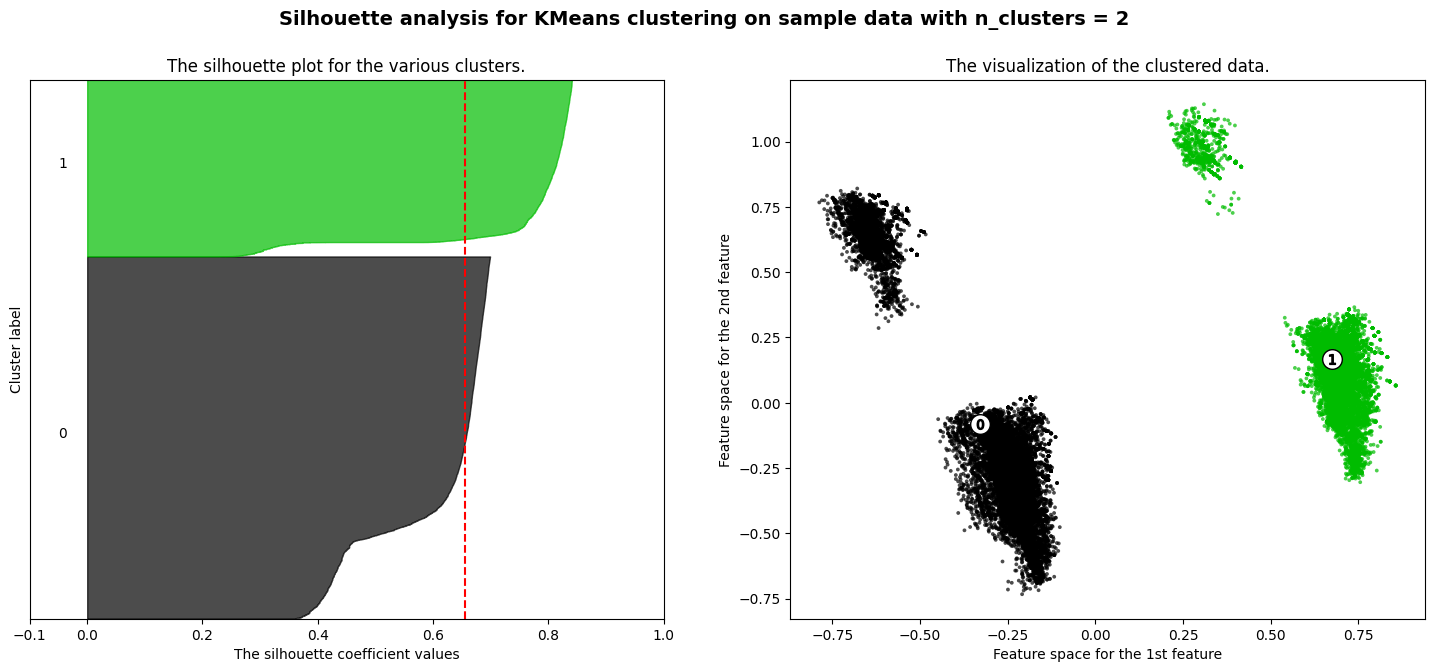

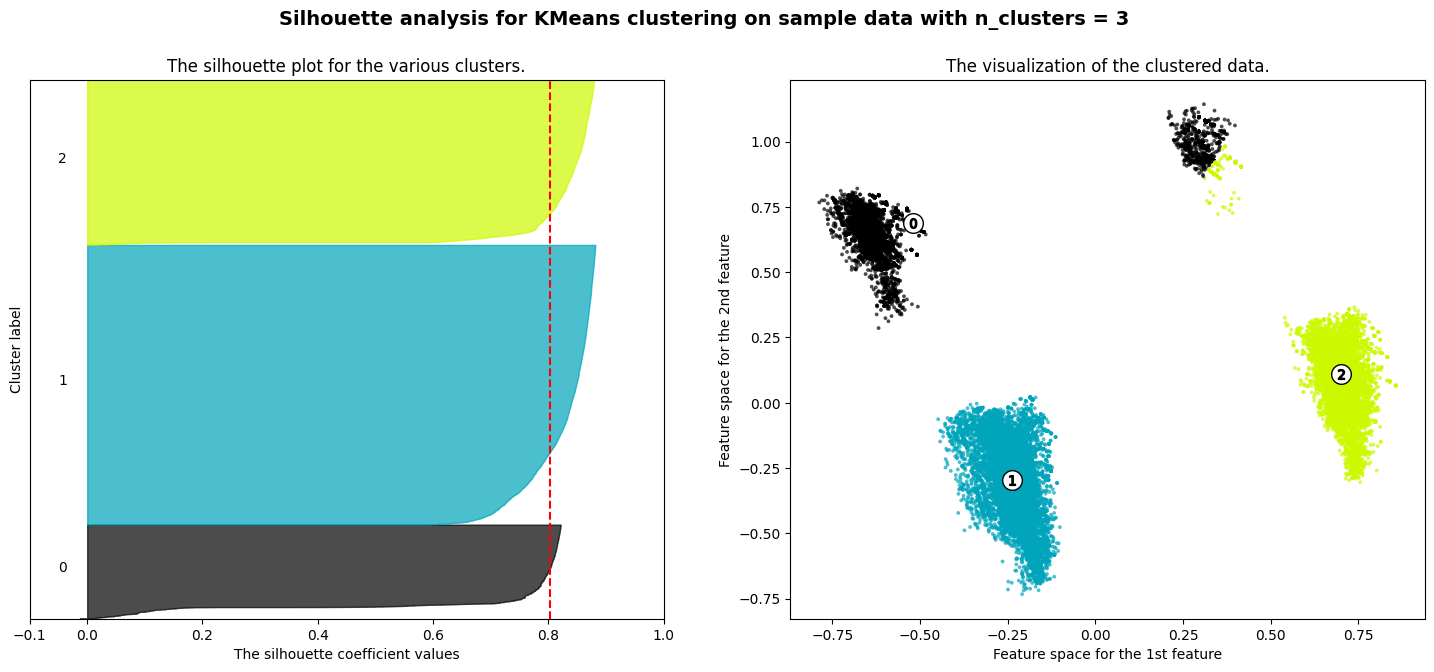

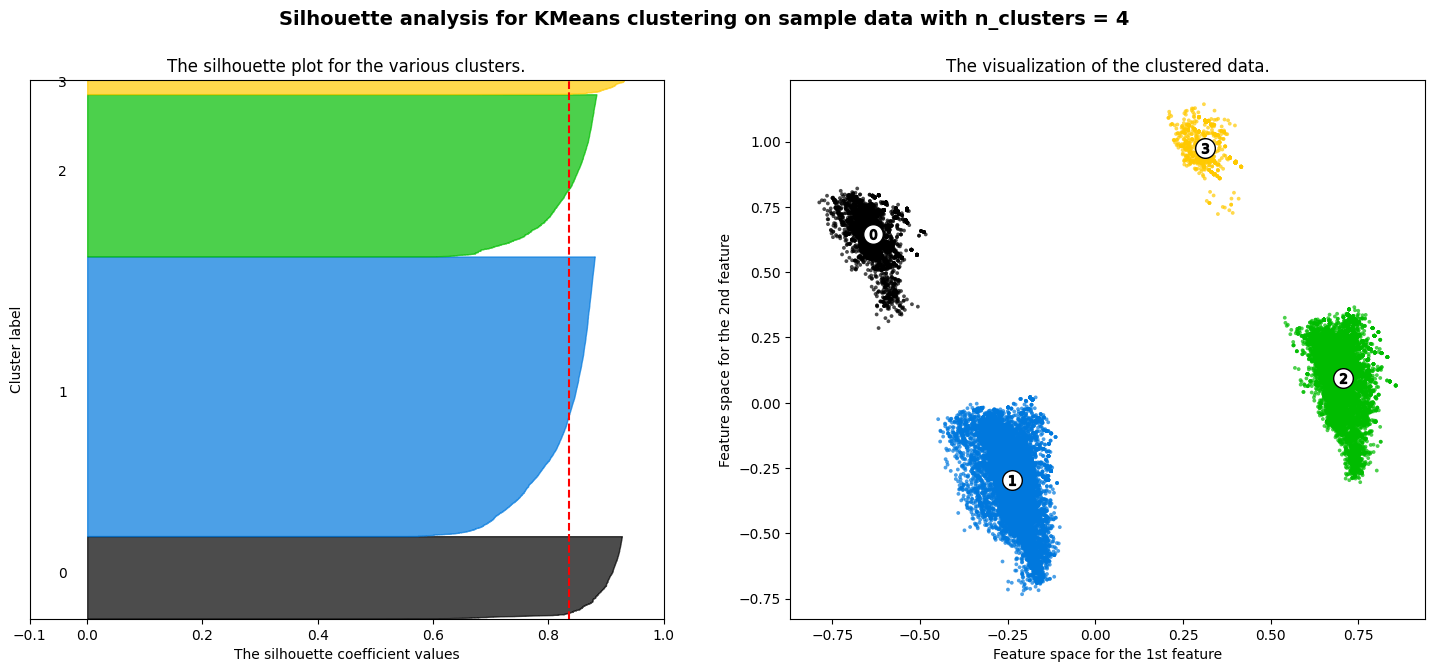

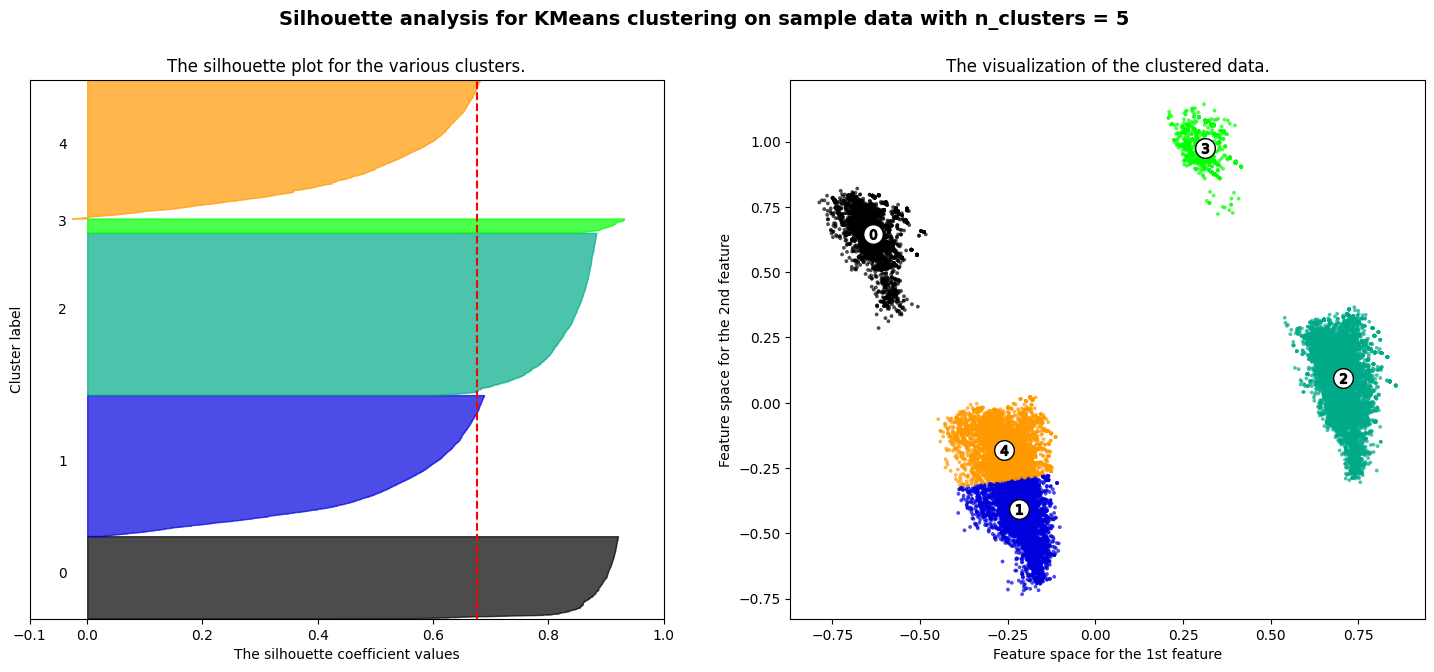

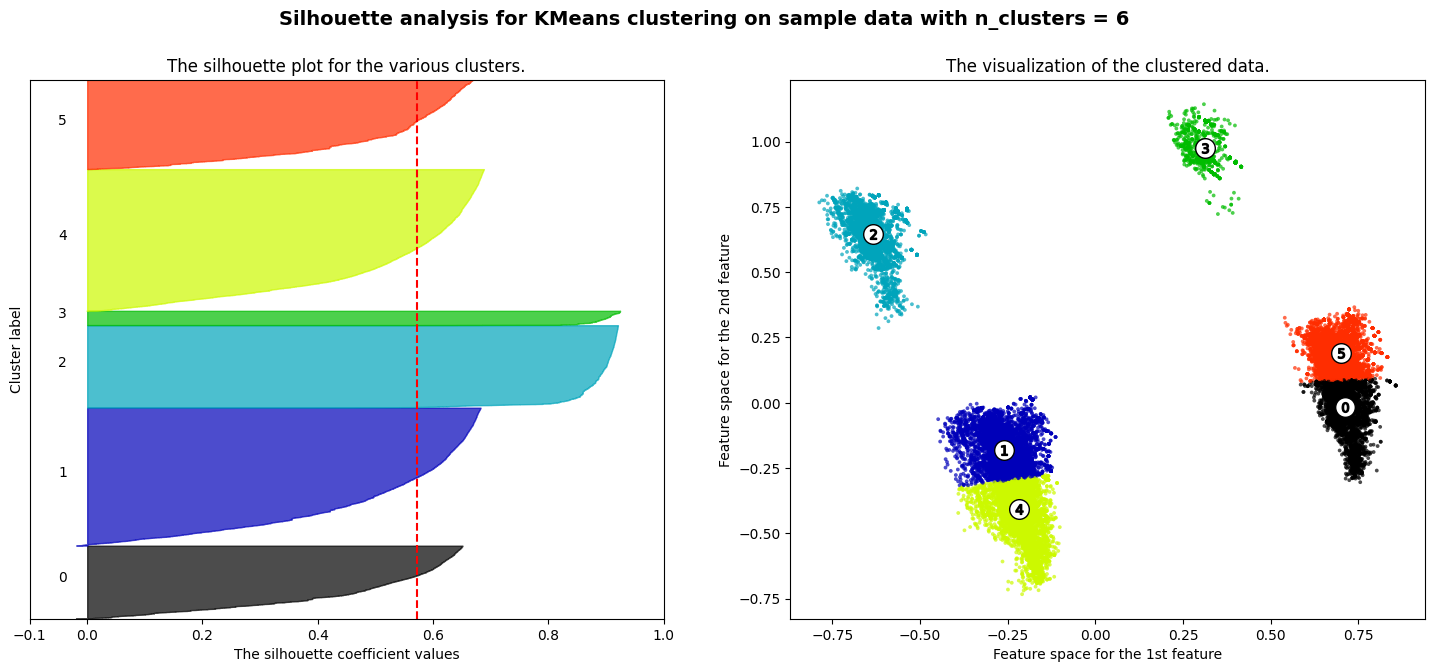

In [30]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [37]:
m_kmeans = KMeans(n_clusters = 4, random_state = 10)
y_kmeans = m_kmeans.fit_predict(Y)

In [38]:
# which rows have been assigned to which clusters?

data = pd.DataFrame(Y, columns=["PC"+str(i) for i in range (1,pcadf_fix2.shape[1]+1)])
y_kmean = pd.DataFrame(y_kmeans)
data["Cluster Labels"] = y_kmeans
data

,PC1,PC2,Cluster Labels
0,-0.198029,0.090638,1
1,-0.181916,0.126202,1
2,0.827682,-0.339754,2
3,-0.178865,0.068818,1
4,-0.222631,0.616505,3
...,...,...,...
24827,-0.169780,0.074268,1
24828,-0.180999,0.124596,1
24829,0.811867,0.149486,2
24830,-0.168348,-0.357343,0


In [39]:
# extract column Cluster Label and add it to the dafa frame
df_cluster = df_scaled.merge(data["Cluster Labels"], left_index=True, right_index=True)
df_cluster

,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,Cluster Labels
0,0.843945,0.730337,0.000000,0.75,0.113402,0.5,0.157708,0.004959,0.003285,0.000021,0.012769,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003447,0.004724,0.0,0.375350,1
2,0.882647,0.337079,0.000000,0.50,0.088539,0.5,0.008366,0.006707,0.006393,0.002492,0.013741,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.005978,0.007297,0.0,1.000000,2
4,0.626717,0.460674,0.038462,0.75,0.906004,1.0,0.080945,0.004581,0.003244,0.000154,0.013069,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.003232,0.004879,1.0,0.834734,3
5,0.769871,0.460674,0.000000,0.75,0.664645,0.5,0.348254,0.014748,0.013702,0.009865,0.021552,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.013620,0.014620,0.0,0.829132,1
6,0.821889,0.797753,0.000000,0.25,0.618557,0.0,0.000000,0.008911,0.007748,0.004603,0.019727,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.007455,0.009210,0.0,0.722689,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24826,0.820641,0.786517,0.000000,0.25,0.618557,0.5,0.049780,0.027537,0.025922,0.040339,0.096912,2.982183e-03,1.820013e-01,1.237454e-04,2.795344e-01,0.030418,0.050086,1.0,0.963585,1
24828,0.987932,0.359551,0.000000,0.50,0.377805,0.5,0.026145,0.005905,0.003180,0.000306,0.014518,1.412585e-04,1.871405e-04,2.971907e-05,3.071276e-04,0.003616,0.004477,0.0,0.997199,1
24829,0.758635,0.438202,0.000000,0.50,0.664645,0.0,0.122359,0.035746,0.013854,0.013898,0.018941,4.075031e-08,2.117022e-07,2.133845e-05,2.066586e-04,0.023468,0.015346,0.0,0.809524,2
24830,0.832709,0.595506,0.000000,0.75,0.088539,0.0,0.256223,0.030288,0.029764,0.034862,0.061678,3.260025e-08,1.693618e-07,2.322287e-04,1.218786e-02,0.029134,0.039495,0.0,0.613445,0


# 5. Decision Tree

In [40]:
#import transformed data set into new df
df_transLab = df_scaled.copy()
df_transLab

,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,0.843945,0.730337,0.000000,0.75,0.113402,0.5,0.157708,0.004959,0.003285,0.000021,0.012769,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003447,0.004724,0.0,0.375350
2,0.882647,0.337079,0.000000,0.50,0.088539,0.5,0.008366,0.006707,0.006393,0.002492,0.013741,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.005978,0.007297,0.0,1.000000
4,0.626717,0.460674,0.038462,0.75,0.906004,1.0,0.080945,0.004581,0.003244,0.000154,0.013069,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.003232,0.004879,1.0,0.834734
5,0.769871,0.460674,0.000000,0.75,0.664645,0.5,0.348254,0.014748,0.013702,0.009865,0.021552,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.013620,0.014620,0.0,0.829132
6,0.821889,0.797753,0.000000,0.25,0.618557,0.0,0.000000,0.008911,0.007748,0.004603,0.019727,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.007455,0.009210,0.0,0.722689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,0.937162,0.101124,0.000000,1.00,0.618557,0.5,0.252248,0.004687,0.003012,0.000611,0.013721,2.363518e-08,1.227873e-07,3.796876e-08,2.050676e-07,0.003175,0.004451,0.0,0.801120
28378,0.609238,0.370787,0.000000,0.75,0.634324,0.5,0.046434,0.006658,0.005147,0.001603,0.014488,1.385511e-07,9.653620e-07,1.179637e-04,7.170718e-04,0.005074,0.006314,0.0,0.957983
28379,0.958385,0.516854,0.000000,0.50,0.664645,0.5,0.122778,0.050581,0.045777,0.037233,0.027332,3.803495e-04,1.644100e-03,2.202450e-05,5.076483e-05,0.045977,0.044695,1.0,0.997199
28380,0.695797,0.550562,0.057692,0.75,0.739236,1.0,0.057101,0.005078,0.003404,0.000182,0.013060,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003566,0.004843,0.0,1.000000


###  Definition of training data and target data (label)

In [48]:
# Setting the target variable
X = df_transLab.iloc[:, :-2].join(df_transLab.iloc[:, -1:]) #wenn label nicht in de letzten spalte ist
Y = df_transLab.iloc[:, -2] # as target variable (label)

In [49]:
X # as input variables (training data)

,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,last_transaction
0,0.843945,0.730337,0.000000,0.75,0.113402,0.5,0.157708,0.004959,0.003285,0.000021,0.012769,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003447,0.004724,0.375350
2,0.882647,0.337079,0.000000,0.50,0.088539,0.5,0.008366,0.006707,0.006393,0.002492,0.013741,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.005978,0.007297,1.000000
4,0.626717,0.460674,0.038462,0.75,0.906004,1.0,0.080945,0.004581,0.003244,0.000154,0.013069,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.003232,0.004879,0.834734
5,0.769871,0.460674,0.000000,0.75,0.664645,0.5,0.348254,0.014748,0.013702,0.009865,0.021552,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.013620,0.014620,0.829132
6,0.821889,0.797753,0.000000,0.25,0.618557,0.0,0.000000,0.008911,0.007748,0.004603,0.019727,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.007455,0.009210,0.722689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,0.937162,0.101124,0.000000,1.00,0.618557,0.5,0.252248,0.004687,0.003012,0.000611,0.013721,2.363518e-08,1.227873e-07,3.796876e-08,2.050676e-07,0.003175,0.004451,0.801120
28378,0.609238,0.370787,0.000000,0.75,0.634324,0.5,0.046434,0.006658,0.005147,0.001603,0.014488,1.385511e-07,9.653620e-07,1.179637e-04,7.170718e-04,0.005074,0.006314,0.957983
28379,0.958385,0.516854,0.000000,0.50,0.664645,0.5,0.122778,0.050581,0.045777,0.037233,0.027332,3.803495e-04,1.644100e-03,2.202450e-05,5.076483e-05,0.045977,0.044695,0.997199
28380,0.695797,0.550562,0.057692,0.75,0.739236,1.0,0.057101,0.005078,0.003404,0.000182,0.013060,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003566,0.004843,1.000000


In [50]:
Y

0        0.0
2        0.0
4        1.0
5        0.0
6        0.0
        ... 
28377    0.0
28378    0.0
28379    1.0
28380    0.0
28381    1.0
Name: churn, Length: 24832, dtype: float64

In [51]:
Y.value_counts()

churn
0.0    20314
1.0     4518
Name: count, dtype: int64

### 30-70 Split-validation

We split the data into 2/3 training data and 1/3 test data.

In [52]:
# Generate training and testing set (example for split validation)
# X as training data and Y as label is splitted

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.33, random_state=42)

In [53]:
# check the split sets: proportion 1/3 test to 2/3 training
X_train.shape, X_test.shape

((16637, 18), (8195, 18))

In [54]:
# Decision Tree with Gini Index criterion
# instantiate the DT classifier at dt_gini

from sklearn.tree import DecisionTreeClassifier

# Parameters
dt_gini = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3,
                                min_samples_split=2, min_samples_leaf=1, random_state=42)

dt_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [55]:
# Predict the Test set results with criterion gini index
Y_pred_gini = dt_gini.predict(X_test)

In [56]:
# Comparison of predicted labels y_ped_gini and real test-labels y_test

from sklearn.metrics import accuracy_score

print('The model accuracy with gini index is: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_gini)))

The model accuracy with gini index is: 0.8521


In [57]:
# Overfitting potential check 
# compare traning to test performance --> indicator for overfitting

print('The accuracy score of the decision tree model is: {0:0.4f}'.format(dt_gini.score(X_train, Y_train)))

The accuracy score of the decision tree model is: 0.8503


- compare accuracy scores
- good accuracy? overfitting? etc?

### Visualisaiton of the gini-based decision tree

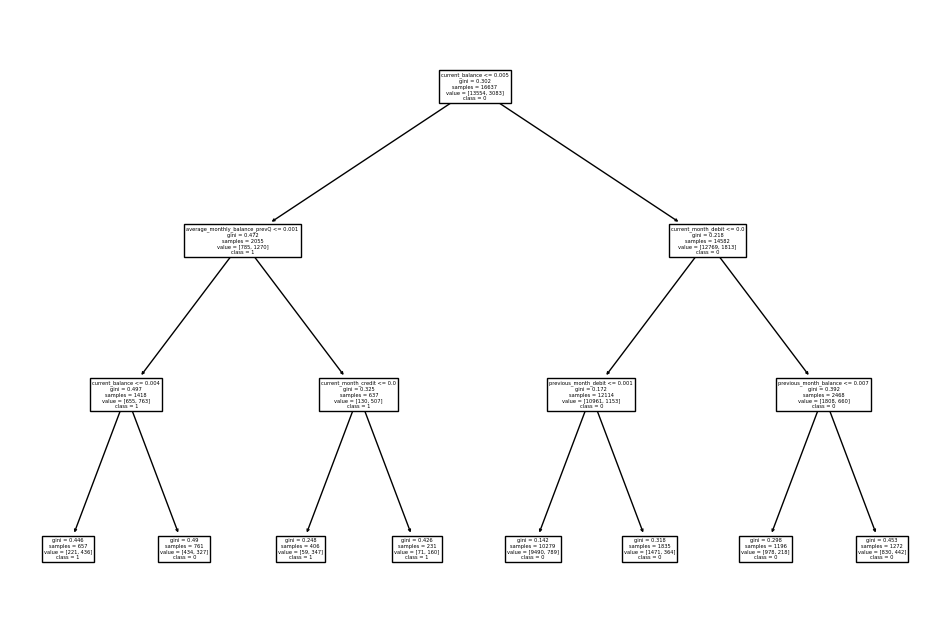

In [58]:
# Visualisaiton of the gini-based decision tree

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_gini.fit(X_train, Y_train), 
               feature_names=[col for col in df_transLab.columns],
               class_names=["0", "1"]);

### Confusion Matrix 

Text(0.5, 1.0, 'Confusion Matrix')

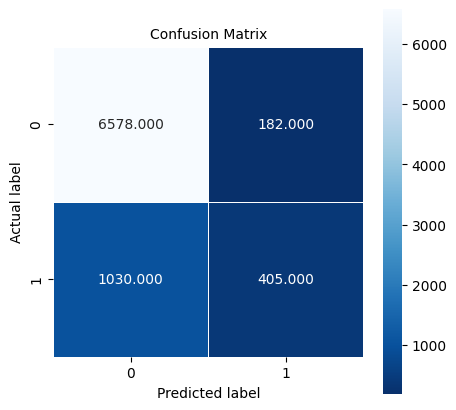

In [59]:
# Displaying the confusion matrix

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

confusion_matrix =metrics.confusion_matrix(Y_test, Y_pred_gini)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r")

plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size=10)

### Classification report
Precision: The proportion of the data classified as positive that actually is positive. It represents the accuracy of positive predictions.

Recall: The relative proportion of correctly classified positive data out of all the actual positive data. It represents the ability of the model to correctly identify positive instances.

F1-Score: The harmonic mean of precision and recall.

In [60]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_gini))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92      6760
         1.0       0.69      0.28      0.40      1435

    accuracy                           0.85      8195
   macro avg       0.78      0.63      0.66      8195
weighted avg       0.83      0.85      0.83      8195



### Cross-Validation

Testing by cross-validation is needed to avoid overfitting.

Model is trained and tested on a new data composition in each rotation. We use k=10 and check whether there is a variation inbetween the k-folds.

In [61]:
# Libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree

# 10-fold cross validation
kf= KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1

# Gerneration of folds
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set: {len(test_index)}')
    cnt += 1

Fold:1, Train set: 22348, Test set: 2484
Fold:2, Train set: 22348, Test set: 2484
Fold:3, Train set: 22349, Test set: 2483
Fold:4, Train set: 22349, Test set: 2483
Fold:5, Train set: 22349, Test set: 2483
Fold:6, Train set: 22349, Test set: 2483
Fold:7, Train set: 22349, Test set: 2483
Fold:8, Train set: 22349, Test set: 2483
Fold:9, Train set: 22349, Test set: 2483
Fold:10, Train set: 22349, Test set: 2483


In [62]:
# Check Overfitting via Cross-Validation

# store respective scores of each crossvalidation variation 
score= cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3,
                                                      min_samples_split=2, min_samples_leaf=1,
                                                      random_state=42), X, Y, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold are: {score}')
print(f'Average accuracy score: {"{:.4f}".format(score.mean())}')

Accuracy scores for each fold are: [0.86231884 0.86714976 0.84132098 0.84695932 0.84857028 0.84655658
 0.85944422 0.8372936  0.84132098 0.86226339]
Average accuracy score: 0.8513


### Parameter Optimisations


In [63]:
# Parameter Optimisations

# prediction accuracy can be elevated by using different depths
max_depth=[2,3,4,5,6,7,8]
for val in max_depth:
    score= cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=val,
                                                      min_samples_split=2, min_samples_leaf=1,
                                                      random_state=42), X, Y, cv=kf, scoring="accuracy")
    print(score.mean())

0.8456819253370584
0.8513197958679408
0.8518031632816518
0.8571994230655738
0.8560314972732455
0.8543400761247335
0.8540181446395879


### DT-Generation without pre-set parameters
The decision tree without pre-set parameters has a complex structure, no interpretability, misses generalizability and brings the risk of overfitting.

In [64]:
# dt_noparam is the tree without pre-set parameters
dt_noparam = DecisionTreeClassifier(criterion='gini', splitter = 'best', random_state = 0)
dt_noparam.fit(X_train, Y_train)

# Predict the Test set results with criterion gini indes
Y_pred = dt_noparam.predict(X_test)

print('The model accuracy with gini index is: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))

The model accuracy with gini index is: 0.7919


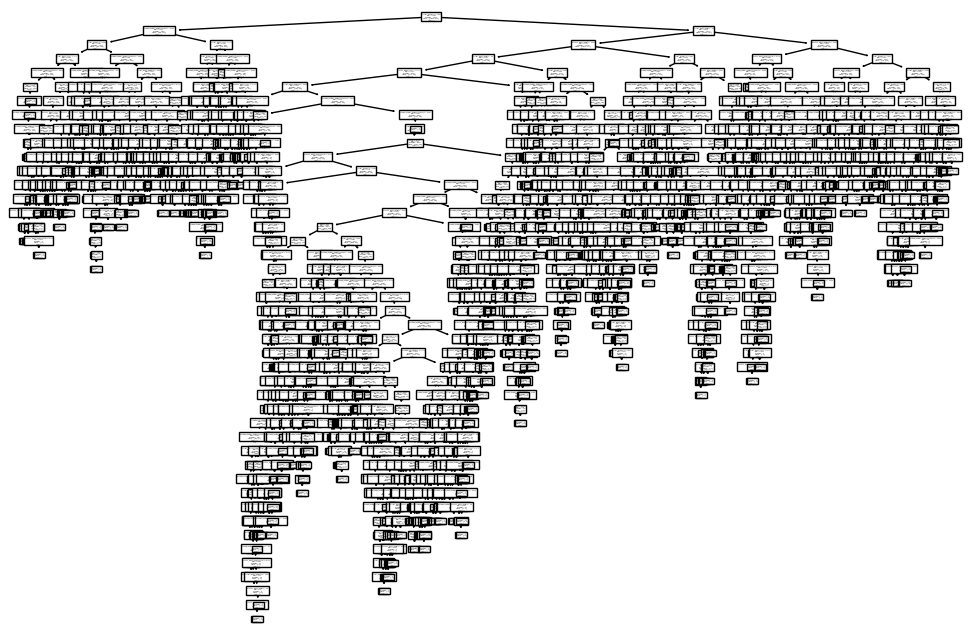

In [65]:
# Visualize the decision tree without pre-set parameters
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_noparam.fit(X_train, Y_train), 
               feature_names=[col for col in df_transLab.columns], class_names=["0", "1"])

plt.show()

### Pruning (Forward Pruning)

Pruning is a process of selectively removing certain parts of a tree, such as branches, to improve the structure of the tree and promote good growth.
We adopt pruning to our desicion tree to avoid overfitting.

In [66]:
# Pruning Application

# we limit the growth of the tree by setting contraints for control variables and use GridSearch for pre-pruning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# defines params containing different combinations of the parameters
params= {"max_depth":[2,3,4,5,6,7], "min_samples_split" : [2,3,4], "min_samples_leaf":[1,2]}

# tree to be tuned without parameters
clf= tree.DecisionTreeClassifier()

# search for the best parameter constellation
gcv=GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [67]:
# recommended constellation of parameters
gcv.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Test score: 0.8600366076876144


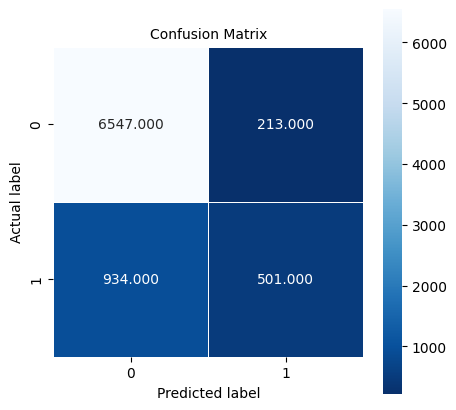

In [68]:
# calculate performance score again  with results from above --> trained model with optimized parameters?
model= gcv.best_estimator_
model.fit(X_train, Y_train)

# use test data set
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)

# use confusion matrix from above to see model performance
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size=10)

# accuracy score 
print(f'Test score: {accuracy_score(Y_test, Y_test_pred )}')

### Visualisation of the pruned decision tree

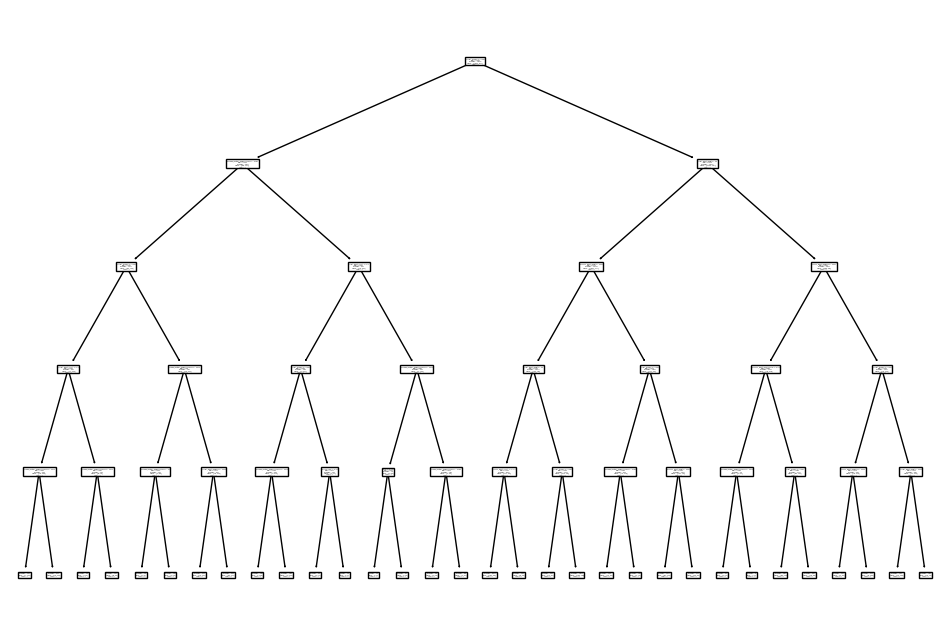

In [69]:
# Visualisation of the pruned decision tree

# vizualize as desicion tree using new "model" instead of dt_gini.fit(X_train, Y_train) from above
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model, feature_names=[col for col in df_transLab.columns],
               class_names=["0", "1"])

# result is an optimized desicion tree
plt.show()

In [70]:
# Visualtisation of the decision rules as text

text_representation= tree.export_text(model, feature_names=[col for col in df_transLab.columns[:-1]])



print(text_representation)

|--- current_balance <= 0.00
|   |--- average_monthly_balance_prevQ <= 0.00
|   |   |--- current_balance <= 0.00
|   |   |   |--- current_month_credit <= 0.00
|   |   |   |   |--- average_monthly_balance_prevQ2 <= 0.01
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- average_monthly_balance_prevQ2 >  0.01
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- current_month_credit >  0.00
|   |   |   |   |--- average_monthly_balance_prevQ2 <= 0.01
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- average_monthly_balance_prevQ2 >  0.01
|   |   |   |   |   |--- class: 0.0
|   |   |--- current_balance >  0.00
|   |   |   |--- average_monthly_balance_prevQ2 <= 0.01
|   |   |   |   |--- average_monthly_balance_prevQ <= 0.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- average_monthly_balance_prevQ >  0.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- average_monthly_balance_prevQ2 >  0.01
|   |   |   |   |--- current_month_balance <= 0.00
|   |   |   |   |   |

### Classification report

In [71]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      6760
         1.0       0.70      0.35      0.47      1435

    accuracy                           0.86      8195
   macro avg       0.79      0.66      0.69      8195
weighted avg       0.84      0.86      0.84      8195

